In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


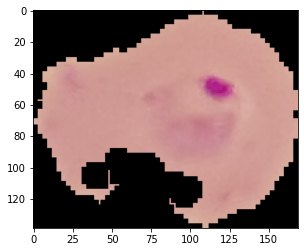

In [ ]:
import matplotlib.pyplot as plt
im = plt.imread('/content/drive/MyDrive/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_139.png')
plt.imshow(im)
plt.show()

In [ ]:
pip install split-folders

In [ ]:
# # define paths
# path_train="/content/drive/MyDrive/cell_images"

In [ ]:
!pip install split-folders[full]

In [ ]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
import splitfolders 
splitfolders.ratio("/content/drive/MyDrive/cell_images/", output="output", seed=47, ratio=(.8, .2)) # default values

Copying files: 10000 files [02:37, 63.64 files/s]


In [ ]:
trainpath = '/content/output/train'
testpath = '/content/output/val'

In [ ]:
code = {'Parasitized':0, 'Uninfected':1}

def getcode(n):
  for x, y in code.items():
    if n == y:
      return x

In [ ]:
import os
import glob as gb
import cv2

x_train = []
y_train = []
for folder in os.listdir(trainpath):
  files = gb.glob(pathname = str(trainpath + '/' + folder + '/*.png'))
  for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image, (150,150))
    x_train.append(list(image_array))
    y_train.append(code[folder])

In [ ]:
x_test = []
y_test = []
for folder in os.listdir(testpath):
  files = gb.glob(pathname = str(trainpath + '/' + folder + '/*.png'))
  for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image, (150,150))
    x_test.append(list(image_array))
    y_test.append(code[folder])

##ResNet50

In [ ]:
import tensorflow as tf

In [ ]:
dnet = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet',
                                        input_shape=(150, 150, 3))
dnet.trainable = False
# Freeze the layers
for layer in dnet.layers:
    layer.trainable = False
   
base_dnet = dnet
base_out = base_dnet.output
pool_out = tf.keras.layers.Flatten()(base_out)
hidden1 = tf.keras.layers.Dense(1024, activation='relu')(pool_out)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(1024, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model3 = tf.keras.Model(inputs=base_dnet.input, outputs=out)
model3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
history = model3.fit(
     x = x_train,
     y = y_train,
     steps_per_epoch=100,
     epochs=100)

Epoch 1/100
100/100 [==============================] - 43s 293ms/step - loss: 2.1994 - accuracy: 0.8311
Epoch 2/100
100/100 [==============================] - 29s 291ms/step - loss: 0.2474 - accuracy: 0.9112
Epoch 3/100
100/100 [==============================] - 29s 291ms/step - loss: 0.1915 - accuracy: 0.9260
Epoch 4/100
100/100 [==============================] - 29s 290ms/step - loss: 0.1929 - accuracy: 0.9255
Epoch 5/100
100/100 [==============================] - 29s 290ms/step - loss: 0.1637 - accuracy: 0.9340
Epoch 6/100
100/100 [==============================] - 29s 290ms/step - loss: 0.1527 - accuracy: 0.9410
Epoch 7/100
100/100 [==============================] - 29s 290ms/step - loss: 0.1508 - accuracy: 0.9434
Epoch 8/100
100/100 [==============================] - 29s 290ms/step - loss: 0.1467 - accuracy: 0.9441
Epoch 9/100
100/100 [==============================] - 29s 290ms/step - loss: 0.1333 - accuracy: 0.9500
Epoch 10/100
100/100 [==============================] - 29s 290m

In [ ]:
preds = model3.predict(x_test)

In [ ]:
y_pred = np.where(preds > 0.5, 1, 0)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy Score :',history.history['accuracy'] )

[[3990   10]
 [   4 3996]]
Accuracy Score : [0.831125020980835, 0.9112499952316284, 0.9259999990463257, 0.9254999756813049, 0.9340000152587891, 0.9409999847412109, 0.9433749914169312, 0.9441249966621399, 0.949999988079071, 0.9426249861717224, 0.9463750123977661, 0.9595000147819519, 0.9649999737739563, 0.9602500200271606, 0.9739999771118164, 0.9723749756813049, 0.9737499952316284, 0.9753749966621399, 0.9743750095367432, 0.9767500162124634, 0.9703750014305115, 0.9748749732971191, 0.9637500047683716, 0.9754999876022339, 0.9754999876022339, 0.9700000286102295, 0.9732499718666077, 0.9696249961853027, 0.9808750152587891, 0.9761250019073486, 0.9737499952316284, 0.9810000061988831, 0.9829999804496765, 0.9736250042915344, 0.984000027179718, 0.9825000166893005, 0.9752500057220459, 0.981124997138977, 0.9832500219345093, 0.9851250052452087, 0.9856250286102295, 0.9783750176429749, 0.9838749766349792, 0.9825000166893005, 0.9826250076293945, 0.9788749814033508, 0.9865000247955322, 0.9851250052452087,

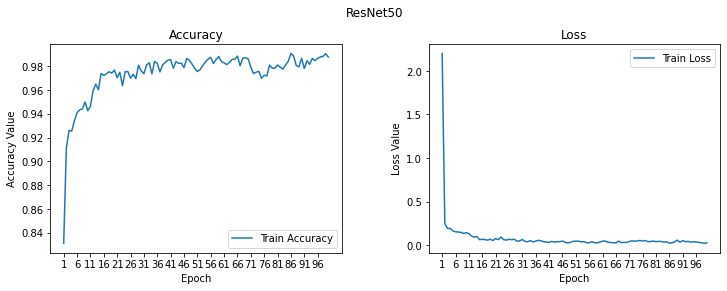

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('ResNet50', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#MobileNetV2

In [ ]:
dnet = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet',
                                        input_shape=(150, 150, 3))
dnet.trainable = False
# Freeze the layers
for layer in dnet.layers:
    layer.trainable = False
   
base_dnet = dnet
base_out = base_dnet.output
pool_out = tf.keras.layers.Flatten()(base_out)
hidden1 = tf.keras.layers.Dense(512, activation='relu')(pool_out)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model5 = tf.keras.Model(inputs=base_dnet.input, outputs=out)
model5.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
history = model5.fit(
     x = x_train,
     y = y_train,
     steps_per_epoch=100,
     epochs=100)

Epoch 1/100
100/100 [==============================] - 15s 110ms/step - loss: 1.2405 - accuracy: 0.7423
Epoch 2/100
100/100 [==============================] - 11s 110ms/step - loss: 0.3497 - accuracy: 0.8484
Epoch 3/100
100/100 [==============================] - 11s 110ms/step - loss: 0.3229 - accuracy: 0.8629
Epoch 4/100
100/100 [==============================] - 11s 110ms/step - loss: 0.3157 - accuracy: 0.8577
Epoch 5/100
100/100 [==============================] - 11s 110ms/step - loss: 0.3546 - accuracy: 0.8496
Epoch 6/100
100/100 [==============================] - 11s 110ms/step - loss: 0.3067 - accuracy: 0.8700
Epoch 7/100
100/100 [==============================] - 11s 110ms/step - loss: 0.2855 - accuracy: 0.8796
Epoch 8/100
100/100 [==============================] - 11s 110ms/step - loss: 0.3188 - accuracy: 0.8605
Epoch 9/100
100/100 [==============================] - 11s 110ms/step - loss: 0.2792 - accuracy: 0.8829
Epoch 10/100
100/100 [==============================] - 11s 110m

In [ ]:
preds = model5.predict(x_test)

In [ ]:
y_pred = np.where(preds > 0.5, 1, 0)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy Score :',history.history['accuracy'] )

[[3942   58]
 [   3 3997]]
Accuracy Score : [0.7422500252723694, 0.8483750224113464, 0.8628749847412109, 0.8577499985694885, 0.8496249914169312, 0.8700000047683716, 0.8796250224113464, 0.8604999780654907, 0.8828750252723694, 0.8758749961853027, 0.8816249966621399, 0.890874981880188, 0.8996250033378601, 0.8931249976158142, 0.8949999809265137, 0.9164999723434448, 0.8953750133514404, 0.9112499952316284, 0.9179999828338623, 0.9167500138282776, 0.921500027179718, 0.9272500276565552, 0.9318749904632568, 0.937125027179718, 0.9437500238418579, 0.9416249990463257, 0.9441249966621399, 0.937250018119812, 0.9447500109672546, 0.9449999928474426, 0.9472500085830688, 0.9415000081062317, 0.9152500033378601, 0.9317499995231628, 0.9338750243186951, 0.9617499709129333, 0.9566249847412109, 0.9549999833106995, 0.9599999785423279, 0.9516249895095825, 0.9580000042915344, 0.9660000205039978, 0.9418749809265137, 0.9542499780654907, 0.9517499804496765, 0.9468749761581421, 0.9611250162124634, 0.9678750038146973,

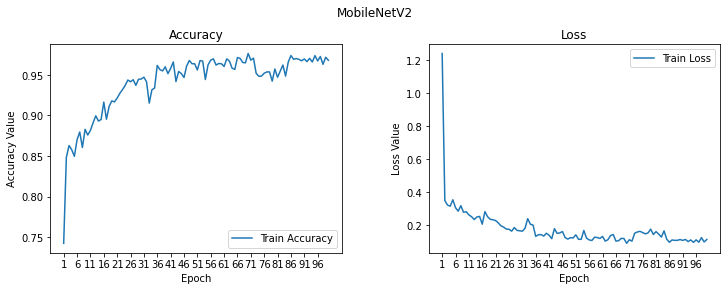

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('MobileNetV2', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
# model5.save('drive/MyDrive/MobileNet')

In [ ]:
# model5.save_weights('drive/MyDrive/MobileNet-Weights')